# Color Quantization using K-Means

Este ejemplo ilustra cómo usar K-Means para reducir el número de colores en una imagen (cuantización de color), lo que puede ser útil para la compresión de imágenes.

Ajustando modelo con 8 colores en una submuestra de la data
Hecho en 0.146s.
Prediciendo los índices de color en la imagen completa (k-means)
Hecho en 0.006s.
Prediciendo los índices de color en la imagen completa (aleatorio)
Hecho en 0.007s.


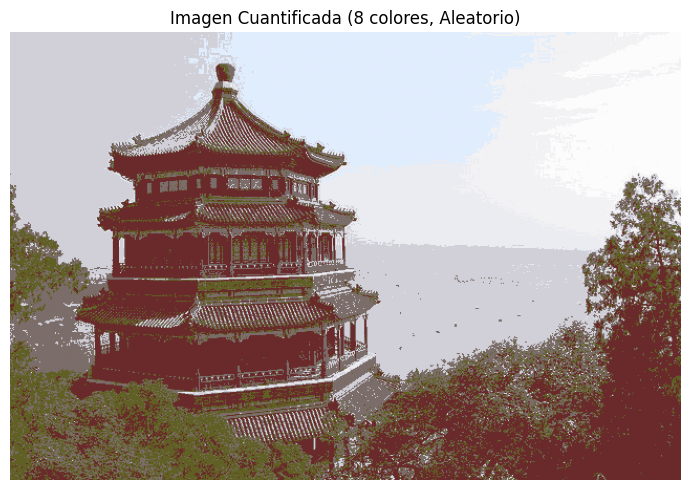

Ajustando modelo con 16 colores en una submuestra de la data
Hecho en 0.019s.
Prediciendo los índices de color en la imagen completa (k-means)
Hecho en 0.004s.
Prediciendo los índices de color en la imagen completa (aleatorio)
Hecho en 0.007s.


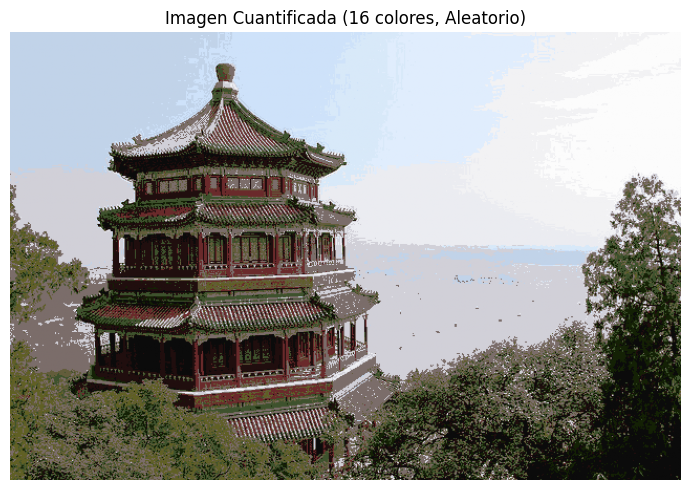

Ajustando modelo con 32 colores en una submuestra de la data
Hecho en 0.014s.
Prediciendo los índices de color en la imagen completa (k-means)
Hecho en 0.006s.
Prediciendo los índices de color en la imagen completa (aleatorio)
Hecho en 0.016s.


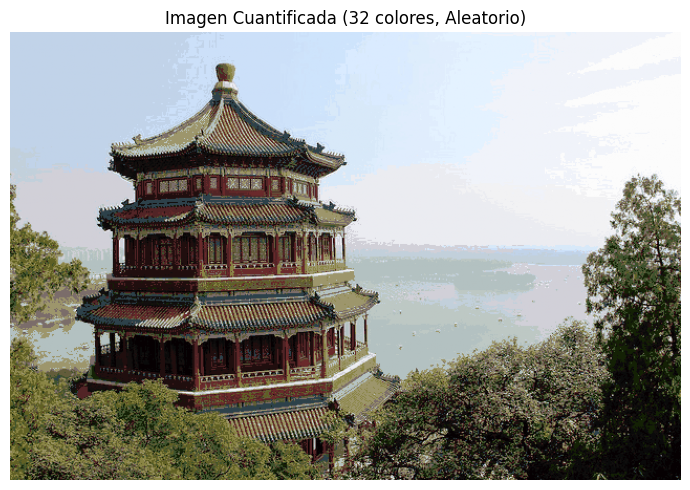

Ajustando modelo con 64 colores en una submuestra de la data
Hecho en 0.020s.
Prediciendo los índices de color en la imagen completa (k-means)
Hecho en 0.007s.
Prediciendo los índices de color en la imagen completa (aleatorio)
Hecho en 0.011s.


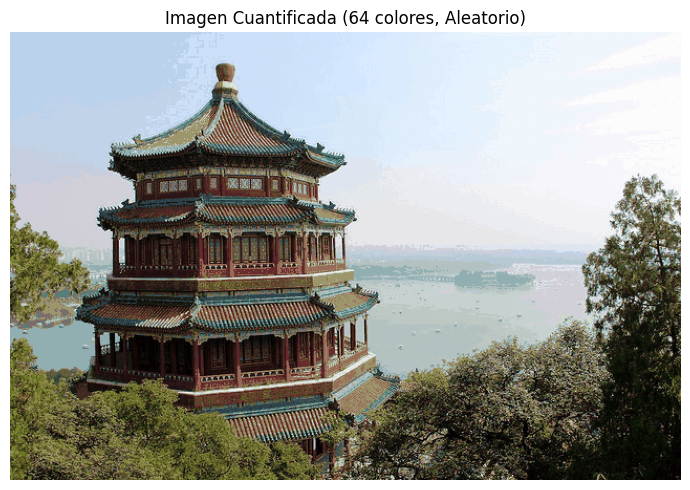

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Cargar la imagen de ejemplo
china = load_sample_image("china.jpg")

# Convertir a flotantes y normalizar
china = np.array(china, dtype=np.float64) / 255

# Obtener dimensiones de la imagen
w, h, d = original_shape = tuple(china.shape)
assert d == 3

# Reformatear la imagen en una matriz 2D (píxeles x características)
image_array = np.reshape(china, (w * h, d))

# Número de colores a utilizar en la imagen cuantificada
n_colors = [8, 16, 32, 64]

# Iterar sobre diferentes valores de n_colors
for n_c in n_colors:
    # Ajustar KMeans a una submuestra de la imagen para acelerar el proceso
    print(f"Ajustando modelo con {n_c} colores en una submuestra de la data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n_c, random_state=0).fit(image_array_sample)
    print(f"Hecho en {time() - t0:0.3f}s.")

    # Obtener las etiquetas de clúster para todos los píxeles
    print("Prediciendo los índices de color en la imagen completa (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"Hecho en {time() - t0:0.3f}s.")

    # Generar un codebook aleatorio para comparar
    codebook_random = shuffle(image_array, random_state=0, n_samples=n_c)
    print("Prediciendo los índices de color en la imagen completa (aleatorio)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"Hecho en {time() - t0:0.3f}s.")

    # Función para reconstruir la imagen a partir de un codebook y etiquetas
    def recreate_image(codebook, labels, w, h):
        return codebook[labels].reshape(w, h, -1)

    # Mostrar los resultados
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.clf()
    plt.axis("off")
    plt.title("Imagen Original (96,615 colores)")
    plt.imshow(china)

    plt.subplot(1, 3, 2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Imagen Cuantificada ({n_c} colores, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

    plt.subplot(1, 3, 3)
    plt.clf()
    plt.axis("off")
    plt.title(f"Imagen Cuantificada ({n_c} colores, Aleatorio)")
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))

    plt.tight_layout()
    plt.show()

# K-means Clustering

Este ejemplo muestra cómo aplicar KMeans al conjunto de datos Iris para agrupar las flores en función de sus características.

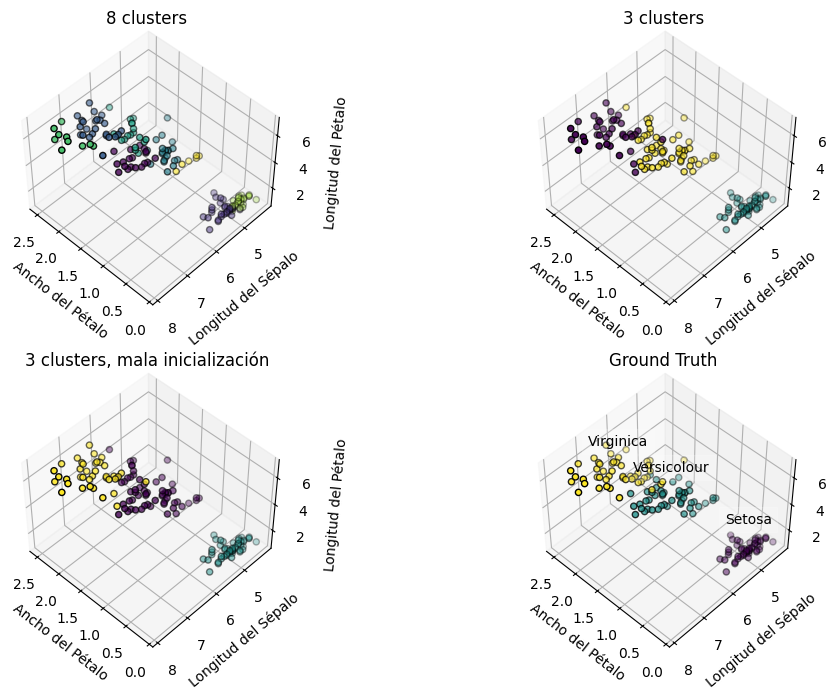

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Definir los estimadores de KMeans
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

# Crear la figura y los subplots
fig = plt.figure(figsize=(12, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, mala inicialización"]

# Iterar sobre los estimadores y graficar los resultados
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.set_xlabel("Ancho del Pétalo")
    ax.set_ylabel("Longitud del Sépalo")
    ax.set_zlabel("Longitud del Pétalo")
    ax.set_title(title)

# Graficar la verdad básica (ground truth)
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.set_xlabel("Ancho del Pétalo")
ax.set_ylabel("Longitud del Sépalo")
ax.set_zlabel("Longitud del Pétalo")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

# Bisecting K-Means and Regular K-Means Performance Comparison

Este ejemplo compara el rendimiento de K-Means regular y Bisecting K-Means en un conjunto de datos generado artificialmente.

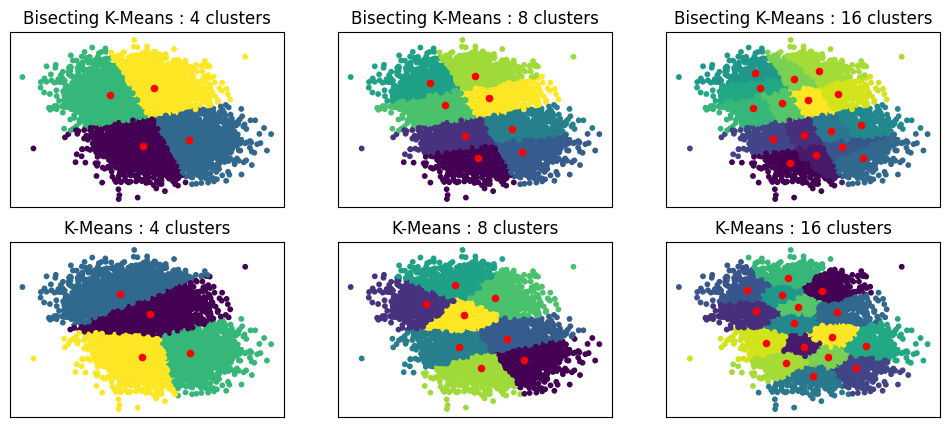

In [3]:
import matplotlib.pyplot as plt

from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

# Generar datos de muestra
n_samples = 10000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Número de clústeres para KMeans y BisectingKMeans
n_clusters_list = [4, 8, 16]

# Algoritmos a comparar
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Crear subplots para cada variante
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

# Iterar sobre los algoritmos y el número de clústeres
for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        # Ajustar el algoritmo a los datos
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        # Graficar los resultados
        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

# Ocultar etiquetas de los ejes para una mejor visualización
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()